Based on the use of the Fitness, predict the number of visitors to the Fitness, taking into account the influence of 
1.    Seasons
2.    Holidays
3.    The day of the week
4.    Gender
5.    Educational institution (Hanze vs. UG)
6.    Exam periods for the UG students.

# Install Library

In [ ]:
#%pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Read CSV files

In [257]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import glob
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#cardholders
cardholderPath = r".\Data\Cardholders"

#get all CSV files in the folder
cardholderCSV = glob.glob(os.path.join(cardholderPath, "*.csv"))

#create empty list
dfs = []

#loop over the list of csv files
for f in cardholderCSV:

	#read the csv file
	df = pd.read_csv(f)
	#print(df.shape[0])
	dfs.append(df)

#concat all csv into one dataframe
cardholderDF = pd.concat(dfs)
cardholderDF.columns = ["Client ID", "Male", "Female", "Card Type"]

#print the content
print('Cardholders:')
display(cardholderDF.head())
print(cardholderDF.info())
print(cardholderDF.describe())


Cardholders:


,Client ID,Male,Female,Card Type
0,206602,NaN,Vrouw,ACLO Card 2020-2021
1,220965,NaN,Vrouw,ACLO Card 2020-2021
2,221004,Man,NaN,ACLO Card 2020-2021
3,200011,Man,NaN,ACLO Card 2020-2021
4,187611,Man,NaN,ACLO Card 2020-2021


<class 'pandas.core.frame.DataFrame'>
Index: 32830 entries, 0 to 1370
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Client ID  32830 non-null  int64 
 1   Male       14903 non-null  object
 2   Female     17119 non-null  object
 3   Card Type  32830 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB
None
           Client ID
count   32830.000000
mean   212305.477490
std     19069.354786
min     11117.000000
25%    203387.000000
50%    217945.000000
75%    225501.000000
max    235614.000000


In [5]:
#checkin times
checkinPath = r".\Data\Check-in times"

#get all CSV files in the folder
checkinCSV = glob.glob(os.path.join(checkinPath, "*.csv"))

#create empty list
dfs = []

#loop over the list of csv files
for f in checkinCSV:

	#read the csv file
	df = pd.read_csv(f)
	#print(df.shape[0])
	dfs.append(df)

#concat all csv into one dataframe
checkinDF = pd.concat(dfs, ignore_index=True)

#print the content
print('Checkin Times:')
display(checkinDF.head())

#merge two Lid id together
print(checkinDF.info())
checkinDF.columns = ["Client ID", "Institution", "Gender", "Card Type", "Checkin Time", "Extra"]
checkinDF["Institution"] = checkinDF["Institution"].fillna(checkinDF["Extra"])
checkinDF.drop(["Extra"], axis=1, inplace=True)

#print the content
print('After Removing Duplicated Columns:')
display(checkinDF.head())
print(checkinDF.info())
print(checkinDF.describe())

Checkin Times:


,Klant nr,Lid id,Geslacht,Abo bezoek,Incheckdatum,Lid id
0,168236,Medewerker RUG,M,Fitness Card 2016-2017,2017-08-01 12:49:10,NaN
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,NaN
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,NaN
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,NaN
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380785 entries, 0 to 380784
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Klant nr      380785 non-null  int64 
 1   Lid id        102827 non-null  object
 2   Geslacht      380785 non-null  object
 3   Abo bezoek    373011 non-null  object
 4   Incheckdatum  380785 non-null  object
 5   Lid id        253005 non-null  object
dtypes: int64(1), object(5)
memory usage: 17.4+ MB
None
After Removing Duplicated Columns:


,Client ID,Institution,Gender,Card Type,Checkin Time
0,168236,Medewerker RUG,M,Fitness Card 2016-2017,2017-08-01 12:49:10
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380785 entries, 0 to 380784
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Client ID     380785 non-null  int64 
 1   Institution   355832 non-null  object
 2   Gender        380785 non-null  object
 3   Card Type     373011 non-null  object
 4   Checkin Time  380785 non-null  object
dtypes: int64(1), object(4)
memory usage: 14.5+ MB
None
           Client ID
count  380785.000000
mean   191590.238121
std     28360.215007
min        26.000000
25%    183541.000000
50%    196651.000000
75%    207474.000000
max    235293.000000


# EDA

## Card Holders

### Districution by type of card

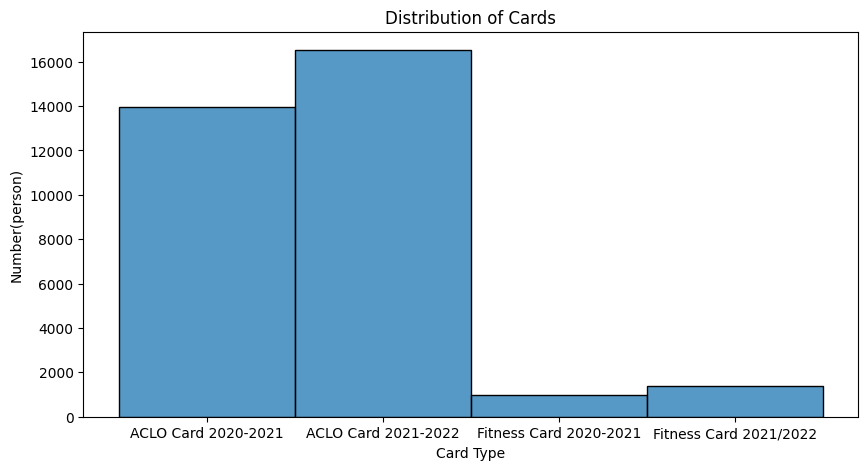

In [6]:
#type of cards
plt.figure(figsize=(10,5))
CardYear = sns.histplot(cardholderDF["Card Type"])
CardYear.set_title("Distribution of Cards")
CardYear.set_xlabel("Card Type")
CardYear.set_ylabel("Number(person)")

plt.show()

### Distribution by Gender

In [7]:
#gender
display(cardholderDF.head())

#combine gender column
cardholderDF["Male"] = cardholderDF["Male"].fillna(cardholderDF["Female"])
display(cardholderDF.head())

,Client ID,Male,Female,Card Type
0,206602,NaN,Vrouw,ACLO Card 2020-2021
1,220965,NaN,Vrouw,ACLO Card 2020-2021
2,221004,Man,NaN,ACLO Card 2020-2021
3,200011,Man,NaN,ACLO Card 2020-2021
4,187611,Man,NaN,ACLO Card 2020-2021


,Client ID,Male,Female,Card Type
0,206602,Vrouw,Vrouw,ACLO Card 2020-2021
1,220965,Vrouw,Vrouw,ACLO Card 2020-2021
2,221004,Man,NaN,ACLO Card 2020-2021
3,200011,Man,NaN,ACLO Card 2020-2021
4,187611,Man,NaN,ACLO Card 2020-2021


In [8]:
#remove extra column
cardholderDF.drop(["Female"], axis=1, inplace=True)
cardholderDF = cardholderDF.rename(columns={"Male": "Gender"})
display(cardholderDF.head())
print(cardholderDF["Gender"].value_counts())

,Client ID,Gender,Card Type
0,206602,Vrouw,ACLO Card 2020-2021
1,220965,Vrouw,ACLO Card 2020-2021
2,221004,Man,ACLO Card 2020-2021
3,200011,Man,ACLO Card 2020-2021
4,187611,Man,ACLO Card 2020-2021


Gender
Vrouw    17119
Man      14903
Name: count, dtype: int64


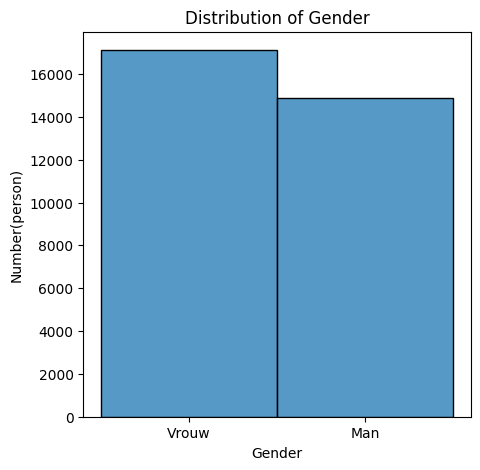

In [9]:
#Plot
plt.figure(figsize=(5,5))
Gender = sns.histplot(cardholderDF["Gender"])
Gender.set_title("Distribution of Gender")
Gender.set_xlabel("Gender")
Gender.set_ylabel("Number(person)")


plt.show()

## Check In Times

### Used Times by Education Institute

In [10]:
#check in times by education institute
print(checkinDF["Institution"].unique())

['Medewerker RUG      ' 'RUG       ' nan 'Hanze       ' 'Hanze      '
 '         ' ' ' 'GORM' 'CRUGET' '     ' 'WIWI' 'GEEJ' '       ' 'ETGE'
 'DROK' 'OLTI' 'Medewerker RUGORUGHanze' '   ' 'WITF' '  ' '      ' 'JEVA'
 'VALE' 'UIWI' 'VWIL' 'Hanze ' '    ' 'DUJMedewerker RUG' 'KAJA'
 'RUGCHanzeHanze' 'MEAD' '        ' 'RORA' 'Medewerker RUGARN' 'JEEU'
 'Medewerker RUG/Hanze        ' 'Medewerker RUG/Hanze          '
 'Medewerker RUG/Hanze           ' 'RUG           '
 'Medewerker RUG/Hanze       ' 'RUG             ' 'Hanze            '
 'RUG          ' 'RUG            ' 'Medewerker RUG/Hanze         '
 'Hanze              ' 'Hanze        ' 'Hanze             '
 'Hanze                ' 'Hanze         ' 'Hanze               '
 'Medewerker RUG/Hanze             ' 'RUG              '
 'Hanze           ' 'Hanze          ' 'RUG                '
 'RUG               ' 'Medewerker RUG/Hanze              '
 'Medewerker RUG/Hanze            ' 'RUG                 ' 'RUG         '
 'RUG        ' 'Han

In [11]:
#clean data
checkinDF["Institution"] = checkinDF["Institution"].str.strip()
checkinDF["Institution"].dropna(inplace = True)
print(checkinDF["Institution"].unique())

['Medewerker RUG' 'RUG' nan 'Hanze' '' 'GORM' 'CRUGET' 'WIWI' 'GEEJ'
 'ETGE' 'DROK' 'OLTI' 'Medewerker RUGORUGHanze' 'WITF' 'JEVA' 'VALE'
 'UIWI' 'VWIL' 'DUJMedewerker RUG' 'KAJA' 'RUGCHanzeHanze' 'MEAD' 'RORA'
 'Medewerker RUGARN' 'JEEU' 'Medewerker RUG/Hanze'
 'MedewerkerRUG RUG/HanzeanzeARN' 'DUJMedewerkerRUG RUG/Hanzeanze' 'BNAN'
 'KILI' 'JENRUG' 'BONI' 'HanzeOHanzeO' 'VEHanzeW' 'VRJO' 'RUGAL_dili'
 'MORN' 'A.KoRUGter@rug.nl' 'TARI' 'Medewerkers RUG/Hanze'
 '- -        :  :' '-  -        :  :' 'DUJMedewerkers RUG/Hanze'
 '-1-1 00  00:00:00' 'Medewerkers RUG/HanzeARN' 'WACHanze'
 '-1-1900  00:00:00' 'KLEB' 'AJAA' 'RUGMEL' 'KRJN'
 'Medewerkers RUG/HanzeRWB' 'waya' 'DARA' 'CAWO'
 'ROBMedewerkers RUG/Hanze' 'ROBMedewerker RUG/Hanze'
 'DUJMedewerker RUG/Hanze' 'HanzeEMC' 'MEJJ' '-  -2       :  :'
 'Medewerker RUG/Hanze ARN' 'WERUGW' 'LEFI' 'KLMO' 'NAAU'
 'Medewerker RUG/Hanze OOM' 'Medewerker RUG/Hanze ELO' 'BORUGI' 'HanzeELE'
 'KAFA']


After confirming with the instructor, Data with values like MOOM, AJAA are actually the teacher's IDs from the schools. Hence, I decided to catogorize these data as "Medewerkers RUG/Hanze"

In [12]:
#remove unnecessary and find out all workers
wrongMask = ~checkinDF["Institution"].str.contains("_|-|@", na=False)
workerMask = (~checkinDF["Institution"].isin(["RUG", "Hanze"])) & (
    (checkinDF["Institution"].str.len() == 4) | (checkinDF["Institution"].str.contains("Medewerker|Hanze|RUG"))
)

checkinDF = checkinDF[wrongMask]

workerDF = checkinDF[workerMask]

instituteCount = workerDF["Institution"].value_counts()
print(instituteCount.to_string())

Institution
Medewerker RUG/Hanze              14848
Medewerker RUG                     9552
Medewerkers RUG/Hanze              9095
WIWI                                337
VWIL                                286
BONI                                231
ETGE                                217
GEEJ                                190
UIWI                                171
WITF                                164
RORA                                140
MEAD                                133
MORN                                 81
OLTI                                 63
DUJMedewerkers RUG/Hanze             60
DUJMedewerker RUG/Hanze              59
DROK                                 54
KILI                                 52
LEFI                                 47
HanzeEMC                             44
Medewerkers RUG/HanzeARN             43
CAWO                                 42
WACHanze                             37
KRJN                                 37
DUJMedewerker RUG           

C:\Users\watas\AppData\Local\Temp\ipykernel_58312\498272078.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  workerDF = checkinDF[workerMask]


In [13]:
#make all workers into category Medewerker
checkinDF.loc[workerMask, "Institution"] = "Medewerker RUG/Hanze"
print(checkinDF["Institution"].unique())
print(checkinDF["Institution"].value_counts())

['Medewerker RUG/Hanze' 'RUG' nan 'Hanze' '']
Institution
RUG                     225749
Hanze                    84407
Medewerker RUG/Hanze     36428
                          6431
Name: count, dtype: int64


In [38]:
#remove the annoying ''
checkinDF["Institution"].replace('', np.nan, inplace = True)
checkinDF["Institution"].dropna(inplace = True)
print(checkinDF["Institution"].value_counts())

Institution
RUG                     219528
Hanze                    79017
Medewerker RUG/Hanze     36069
Name: count, dtype: int64


C:\Users\watas\AppData\Local\Temp\ipykernel_58312\648076230.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  checkinDF["Institution"].replace('', np.nan, inplace = True)


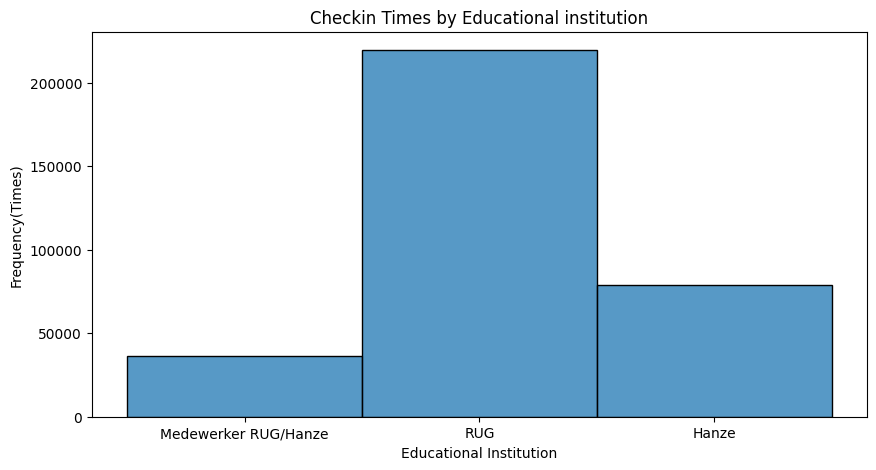

In [40]:
#Plot
plt.figure(figsize=(10,5))
Institutions = sns.histplot(checkinDF["Institution"])
Institutions.set_title("Checkin Times by Educational institution")
Institutions.set_xlabel("Educational Institution")
Institutions.set_ylabel("Frequency(Times)")

plt.show()

### Used Times by Gender

In [41]:
#Check in times by gender

#remove fout(error) data
print(checkinDF["Gender"].value_counts())
foutMask = checkinDF["Gender"] == "fout"
checkinDF = checkinDF.drop(index=checkinDF[foutMask].index)
print(f"After cleaning:\n{checkinDF["Gender"].value_counts()}")

Gender
M    278983
V     82478
Name: count, dtype: int64
After cleaning:
Gender
M    278983
V     82478
Name: count, dtype: int64


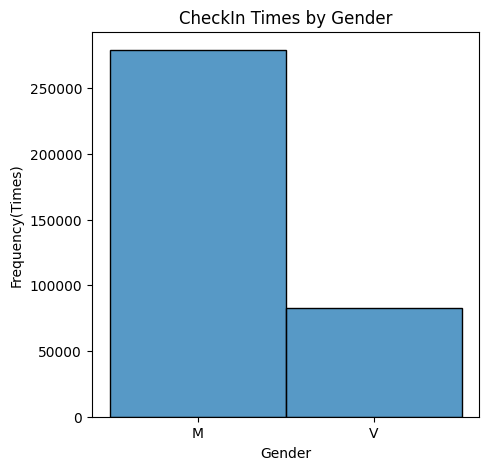

In [42]:
#plot
plt.figure(figsize=(5,5))
cGender = sns.histplot(checkinDF["Gender"])
cGender.set_title("CheckIn Times by Gender")
cGender.set_xlabel("Gender")
cGender.set_ylabel("Frequency(Times)")


plt.show()

### Used Times by CardType

As the previous Card Type distribution indicates, most people hold a regular card. 
It will be normal that the frequency of Regular Card is higher.

Hence, I decided to do normalization with the data.

In [415]:
numCard = checkinDF.groupby("Card Type").size().reset_index(name = "Frequency")
display(numCard)

,Card Type,Frequency
0,ACLO 1st semester Card 2021/2022,364
1,ACLO Card 2021-2022,3293
2,ACLO free Card 2021/2022,45
3,Fitness 'krachtwacht' 2018-2019,1737
4,Fitness 1st semester 2020-2021,1100
5,Fitness 1st semester 2021/2022,1761
6,Fitness 1st semester Card 18-19,3684
7,Fitness 1st semester Card 19-20,6278
8,Fitness 2nd semester 2020-2021,17
9,Fitness 2nd semester Card 18-19,11562


In [457]:
numCard = numCard[numCard["Card Type"].str.contains("ACLO Card|Fitness Card")]
display(numCard)

,Card Type,Frequency
1,ACLO Card 2021-2022,3293
11,Fitness Card 2016-2017,3018
12,Fitness Card 2017-2018,83578
13,Fitness Card 2018-2019,74795
14,Fitness Card 2019-2020,65161
15,Fitness Card 2020-2021,14409
16,Fitness Card 2021/2022,11463


In [458]:
numMemberCard = checkinDF.groupby("Card Type")["Client ID"].nunique().reset_index(name = "Members")
numMemberCard = numMemberCard[numMemberCard["Card Type"].str.contains("ACLO Card|Fitness Card")]

display(numMemberCard)

,Card Type,Members
1,ACLO Card 2021-2022,904
11,Fitness Card 2016-2017,465
12,Fitness Card 2017-2018,1622
13,Fitness Card 2018-2019,1591
14,Fitness Card 2019-2020,1594
15,Fitness Card 2020-2021,826
16,Fitness Card 2021/2022,1099


In [429]:
memberCard = cardholderDF.groupby("Card Type").size().reset_index(name = "Number")
display(memberCard)

,Card Type,Number
0,ACLO Card 2020-2021,13952
1,ACLO Card 2021-2022,16523
2,Fitness Card 2020-2021,984
3,Fitness Card 2021/2022,1371


In [433]:
numAllCard = memberCard.merge(numCard, how = "outer", on = "Card Type")
numAllCard = numAllCard.merge(numMemberCard, how = "outer", on = "Card Type")
numAllCard = numAllCard.fillna(0)

numAllCard["Normalized"] = numAllCard["Frequency"] / numAllCard["Members"]
numAllCard["Active"] = numAllCard.loc[numAllCard["Number"] > 0, "Members"] / numAllCard["Number"]
display(numAllCard)

,Card Type,Number,Frequency,Members,Normalized,Active
0,ACLO Card 2020-2021,13952.0,0.0,0.0,NaN,0.000000
1,ACLO Card 2021-2022,16523.0,3293.0,904.0,3.642699,0.054712
2,Fitness Card 2016-2017,0.0,3018.0,465.0,6.490323,NaN
3,Fitness Card 2017-2018,0.0,83578.0,1622.0,51.527744,NaN
4,Fitness Card 2018-2019,0.0,74795.0,1591.0,47.011314,NaN
5,Fitness Card 2019-2020,0.0,65161.0,1594.0,40.878921,NaN
6,Fitness Card 2020-2021,984.0,14409.0,826.0,17.444310,0.839431
7,Fitness Card 2021/2022,1371.0,11463.0,1099.0,10.430391,0.801605


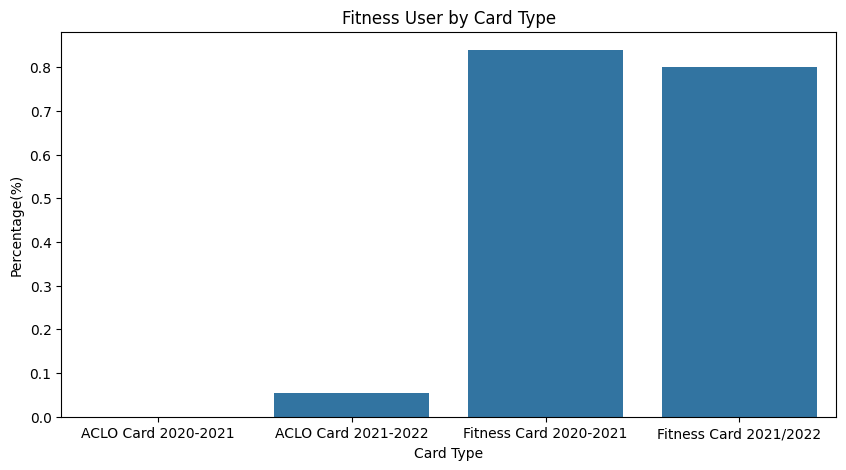

In [440]:
#plot
plt.figure(figsize=(10,5))
cCard = sns.barplot(data = numAllCard[~numAllCard["Active"].isna()], x = "Card Type", y = "Active")
cCard.set_title("Fitness User by Card Type")
cCard.set_xlabel("Card Type")
cCard.set_ylabel("Percentage(%)")


plt.show()

C:\Users\watas\AppData\Local\Temp\ipykernel_58312\1521453529.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cCard.set_xticklabels(labels = cCard.get_xticklabels(), rotation = 45, ha = "right")


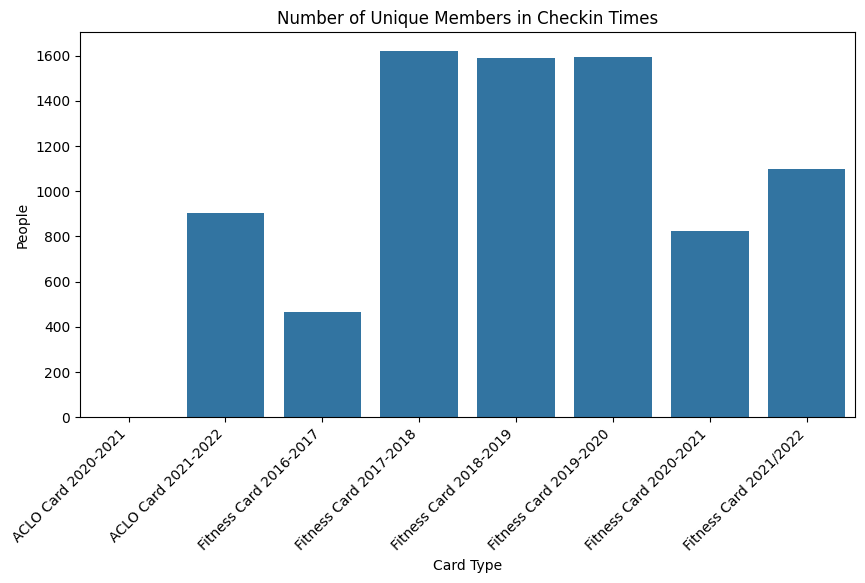

In [446]:
#plot
plt.figure(figsize=(10,5))
cCard = sns.barplot(data = numAllCard, x = "Card Type", y = "Members")
cCard.set_title("Number of Unique Members in Checkin Times")
cCard.set_xlabel("Card Type")
cCard.set_ylabel("People")
cCard.set_xticklabels(labels = cCard.get_xticklabels(), rotation = 45, ha = "right")


plt.show()

C:\Users\watas\AppData\Local\Temp\ipykernel_58312\460155796.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cCard.set_xticklabels(labels = cCard.get_xticklabels(), rotation = 45, ha = "right")


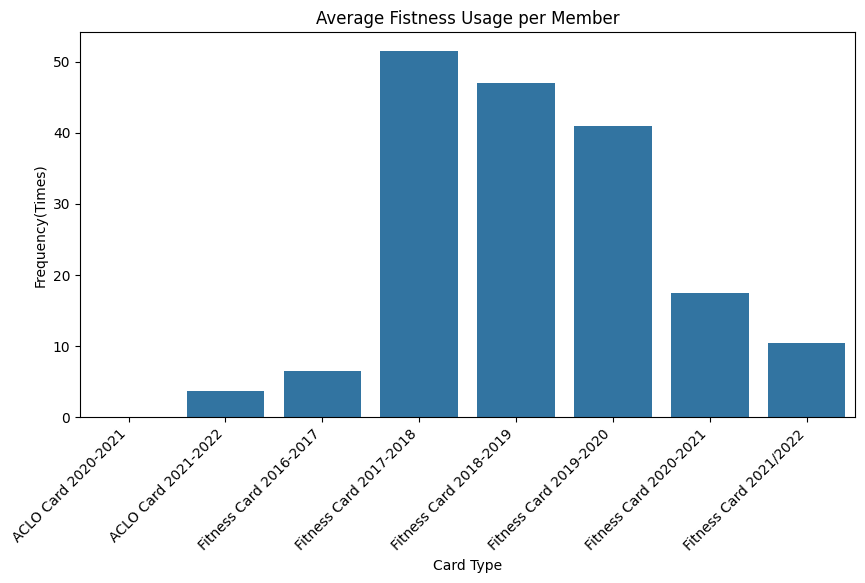

In [451]:
#plot
plt.figure(figsize=(10,5))
cCard = sns.barplot(data = numAllCard, x = "Card Type", y = "Normalized")
cCard.set_title("Average Fistness Usage per Member")
cCard.set_xlabel("Card Type")
cCard.set_ylabel("Frequency(Times)")
cCard.set_xticklabels(labels = cCard.get_xticklabels(), rotation = 45, ha = "right")


plt.show()

### Card Types by Education Institute

In [466]:
numEduCard = checkinDF[checkinDF["Card Type"].str.contains("ACLO Card|Fitness Card", na = False)].\
    groupby(["Institution", "Card Type"])["Client ID"].nunique().reset_index(name = "Number")

display(numEduCard)

,Institution,Card Type,Number
0,Hanze,ACLO Card 2021-2022,224
1,Hanze,Fitness Card 2016-2017,83
2,Hanze,Fitness Card 2017-2018,344
3,Hanze,Fitness Card 2018-2019,363
4,Hanze,Fitness Card 2019-2020,403
5,Hanze,Fitness Card 2020-2021,214
6,Hanze,Fitness Card 2021/2022,311
7,Medewerker RUG/Hanze,Fitness Card 2016-2017,87
8,Medewerker RUG/Hanze,Fitness Card 2017-2018,165
9,Medewerker RUG/Hanze,Fitness Card 2018-2019,20


C:\Users\watas\AppData\Local\Temp\ipykernel_58312\5465622.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  holiday.set_xticklabels(holiday.get_xticklabels(), rotation=45, ha = "right")


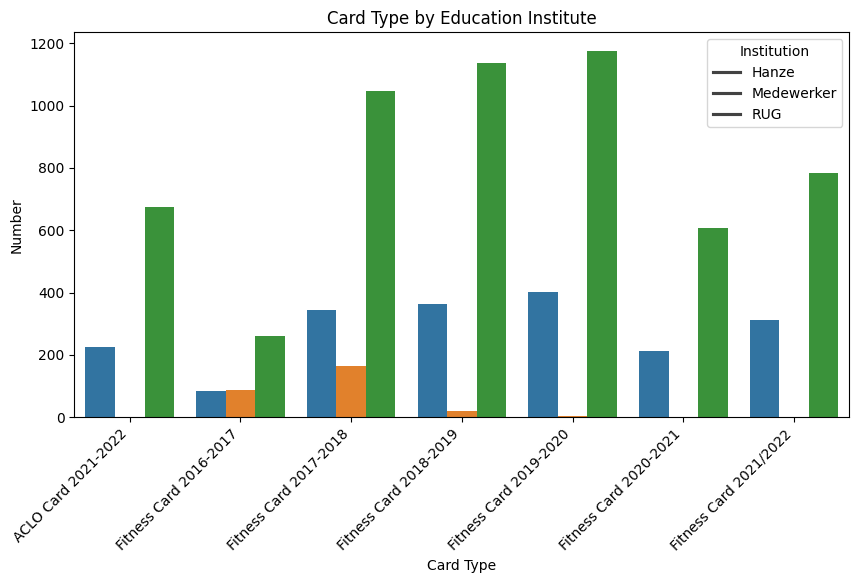

In [467]:
#plot
plt.figure(figsize=(10,5))
holiday = sns.barplot(data = numEduCard, x="Card Type", y="Number", hue="Institution")
holiday.set_title("Card Type by Education Institute")
holiday.set_xlabel("Card Type")
holiday.set_ylabel("Number")
holiday.legend(title = "Institution", labels = ["Hanze", "Medewerker", "RUG"])
holiday.set_xticklabels(holiday.get_xticklabels(), rotation=45, ha = "right")


plt.show()

### Used Times by Month

In [43]:
#Check in times by month

print(type(checkinDF.loc[0, "Checkin Time"]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [44]:
#make string time into datetime
checkinDF["Checkin Time"] = pd.to_datetime(checkinDF["Checkin Time"])

#fetch out year and month
checkinDF["Year"] = checkinDF["Checkin Time"].dt.year
checkinDF["Month"] = checkinDF["Checkin Time"].dt.month_name()

display(checkinDF.head())

,Client ID,Institution,Gender,Card Type,Checkin Time,Year,Month,Weekday,Season
0,168236,Medewerker RUG/Hanze,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August,Tuesday,Summer
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August,Tuesday,Summer
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August,Tuesday,Summer
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August,Tuesday,Summer
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August,Tuesday,Summer


In [45]:
#count frequency of month by each year
numMonth = checkinDF.groupby(['Year', 'Month']).size().reset_index(name='Frequency')
display(numMonth)

,Year,Month,Frequency
0,2017,August,4005
1,2017,December,7554
2,2017,November,10512
3,2017,October,11885
4,2017,September,8308
5,2018,April,9855
6,2018,August,2250
7,2018,December,7926
8,2018,February,11537
9,2018,January,8789


In [46]:
#make month and year as the index and column of the table
monthPivot = numMonth.pivot_table(index='Month', columns='Year', values='Frequency', fill_value = 0, margins = True)
display(monthPivot)

Year,2017,2018,2019,2020,2021,All
Month,,,,,,
April,0.0,9855.000000,10905.000000,0.0,76.000000,6945.333333
August,4005.0,2250.000000,4254.000000,1539.0,2590.000000,2927.600000
December,7554.0,7926.000000,11874.000000,2278.0,177.000000,5961.800000
February,0.0,11537.000000,11396.000000,19633.0,0.000000,14188.666667
January,0.0,8789.000000,10876.000000,15581.0,0.000000,11748.666667
July,0.0,4193.000000,4839.000000,1264.0,2252.000000,3137.000000
June,0.0,9019.000000,9707.000000,8.0,4514.000000,5812.000000
March,0.0,12335.000000,12877.000000,8280.0,0.000000,11164.000000
May,0.0,10543.000000,12899.000000,0.0,1307.000000,8249.666667


In [47]:
#make the table more readable

#sort index by custom month order
monthSort = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthPivot = monthPivot.reindex(monthSort)

display(monthPivot)

Year,2017,2018,2019,2020,2021,All
Month,,,,,,
January,0.0,8789.0,10876.0,15581.0,0.0,11748.666667
February,0.0,11537.0,11396.0,19633.0,0.0,14188.666667
March,0.0,12335.0,12877.0,8280.0,0.0,11164.000000
April,0.0,9855.0,10905.0,0.0,76.0,6945.333333
May,0.0,10543.0,12899.0,0.0,1307.0,8249.666667
June,0.0,9019.0,9707.0,8.0,4514.0,5812.000000
July,0.0,4193.0,4839.0,1264.0,2252.0,3137.000000
August,4005.0,2250.0,4254.0,1539.0,2590.0,2927.600000
September,8308.0,3933.0,10523.0,4634.0,5703.0,6620.200000


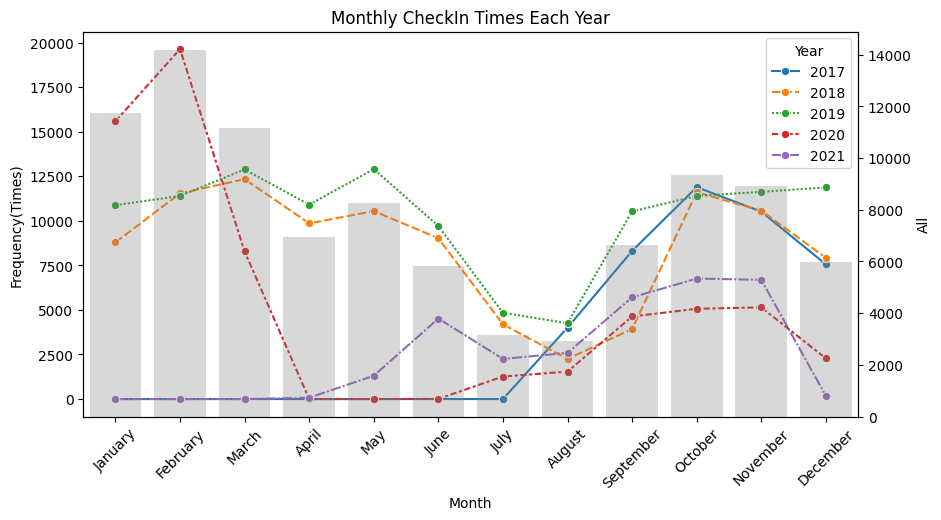

In [48]:
#seperate monthly checkin plot
fig, ax1 = plt.subplots(figsize=(10, 5))

#Lineplot
CheckinMonth = sns.lineplot(data=monthPivot.drop(columns=['All']), marker="o", ax=ax1)
CheckinMonth.set_title("Monthly CheckIn Times Each Year")
CheckinMonth.set_xlabel("Month")
CheckinMonth.set_ylabel("Frequency(Times)")
CheckinMonth.set_xticks(range(len(monthSort))) # Ensure proper spacing for x-axis labels
CheckinMonth.set_xticklabels(monthSort, rotation=45) #increase readability
CheckinMonth.legend(title="Year")

#Barchart for average chackin
ax2 = ax1.twinx()
sns.barplot(x=monthPivot.index, y=monthPivot['All'], alpha=0.3, color='gray', ax=ax2)

plt.show()

### Used Times by weekdays

In [49]:
#Check in times by weekdays

#Fetch weekdays
checkinDF["Weekday"] = checkinDF["Checkin Time"].dt.day_name()

display(checkinDF.head())

,Client ID,Institution,Gender,Card Type,Checkin Time,Year,Month,Weekday,Season
0,168236,Medewerker RUG/Hanze,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August,Tuesday,Summer
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August,Tuesday,Summer
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August,Tuesday,Summer
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August,Tuesday,Summer
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August,Tuesday,Summer


In [50]:
#Count frequency of month by each year
numWeekDay = checkinDF.groupby(['Month', 'Weekday']).size().reset_index(name='Frequency')
display(numWeekDay)

,Month,Weekday,Frequency
0,April,Friday,2328
1,April,Monday,4903
2,April,Saturday,1457
3,April,Sunday,1586
4,April,Thursday,3015
...,...,...,...
79,September,Saturday,2775
80,September,Sunday,2504
81,September,Thursday,5259
82,September,Tuesday,5830


In [51]:
#Make weekday and month as the index and column of the table
weekdayPivot = numWeekDay.pivot_table(index='Weekday', columns='Month', values='Frequency', fill_value = 0, margins = True)
display(weekdayPivot)

Month,April,August,December,February,January,July,June,March,May,November,October,September,All
Weekday,,,,,,,,,,,,,
Friday,2328.000000,2589.000000,4425.000000,5801.000000,5347.000000,2013.000000,3464.000000,4453.000000,3572.000000,6366.000000,6202.000000,4866.000000,4285.500000
Monday,4903.000000,3248.000000,5576.000000,8060.000000,6279.000000,2883.000000,3845.000000,6782.000000,4250.000000,8198.000000,9049.000000,6244.000000,5776.416667
Saturday,1457.000000,492.000000,2310.000000,3518.000000,3042.000000,500.000000,2475.000000,2704.000000,1591.000000,3777.000000,4032.000000,2775.000000,2389.416667
Sunday,1586.000000,343.000000,2662.000000,2954.000000,2964.000000,430.000000,2134.000000,2503.000000,1361.000000,3722.000000,3831.000000,2504.000000,2249.500000
Thursday,3015.000000,2677.000000,4562.000000,6391.000000,5439.000000,2090.000000,3429.000000,5474.000000,4036.000000,6966.000000,6948.000000,5259.000000,4690.500000
Tuesday,4098.000000,2785.000000,5220.000000,7914.000000,5820.000000,2311.000000,4011.000000,5739.000000,4555.000000,7719.000000,8507.000000,5830.000000,5375.750000
Wednesday,3449.000000,2504.000000,5054.000000,7928.000000,6355.000000,2321.000000,3890.000000,5837.000000,5384.000000,7780.000000,8131.000000,5623.000000,5354.666667
All,2976.571429,2091.142857,4258.428571,6080.857143,5035.142857,1792.571429,3321.142857,4784.571429,3535.571429,6361.142857,6671.428571,4728.714286,4303.107143


In [52]:
#increase readability

#sort index and column by order
weekdaySort = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdayPivot = weekdayPivot.reindex(index=weekdaySort, columns=monthSort)

display(weekdayPivot)

Month,January,February,March,April,May,June,July,August,September,October,November,December
Weekday,,,,,,,,,,,,
Monday,6279.0,8060.0,6782.0,4903.0,4250.0,3845.0,2883.0,3248.0,6244.0,9049.0,8198.0,5576.0
Tuesday,5820.0,7914.0,5739.0,4098.0,4555.0,4011.0,2311.0,2785.0,5830.0,8507.0,7719.0,5220.0
Wednesday,6355.0,7928.0,5837.0,3449.0,5384.0,3890.0,2321.0,2504.0,5623.0,8131.0,7780.0,5054.0
Thursday,5439.0,6391.0,5474.0,3015.0,4036.0,3429.0,2090.0,2677.0,5259.0,6948.0,6966.0,4562.0
Friday,5347.0,5801.0,4453.0,2328.0,3572.0,3464.0,2013.0,2589.0,4866.0,6202.0,6366.0,4425.0
Saturday,3042.0,3518.0,2704.0,1457.0,1591.0,2475.0,500.0,492.0,2775.0,4032.0,3777.0,2310.0
Sunday,2964.0,2954.0,2503.0,1586.0,1361.0,2134.0,430.0,343.0,2504.0,3831.0,3722.0,2662.0


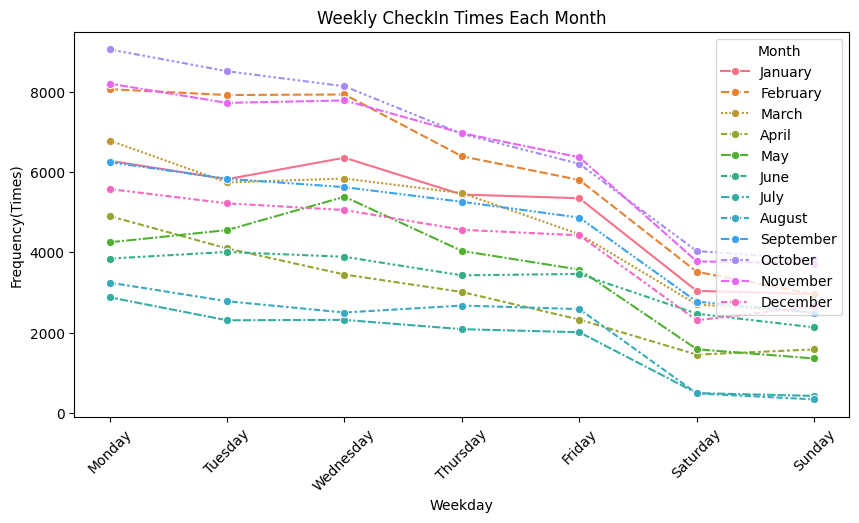

In [29]:
#Plot
plt.figure(figsize=(10,5))
checkinMonth = sns.lineplot(data=weekdayPivot, marker="o")
checkinMonth.set_title("Weekly CheckIn Times Each Month")
checkinMonth.set_xlabel("Weekday")
checkinMonth.set_ylabel("Frequency(Times)")
plt.legend(title="Month")
plt.xticks(rotation=45) #increase readability


plt.show()

### Used TImes by Season

In [53]:
#Check in times by season
def getSeason(month):
    if month in ("December", "January", "February"):
        return "Winter"
    elif month in ("March", "April", "May"):
        return "Spring"
    elif month in ("June", "July", "August"):
        return "Summer"
    else:
        return "Fall"

In [54]:
checkinDF["Season"] = checkinDF["Month"].apply(getSeason)
display(checkinDF.head())

,Client ID,Institution,Gender,Card Type,Checkin Time,Year,Month,Weekday,Season
0,168236,Medewerker RUG/Hanze,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August,Tuesday,Summer
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August,Tuesday,Summer
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August,Tuesday,Summer
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August,Tuesday,Summer
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August,Tuesday,Summer


In [55]:
#group season by year
numSeason = checkinDF.groupby(['Year', 'Season']).size().reset_index(name='Frequency')
display(numSeason)

,Year,Season,Frequency
0,2017,Fall,30705
1,2017,Summer,4005
2,2017,Winter,7554
3,2018,Fall,26094
4,2018,Spring,32733
5,2018,Summer,15462
6,2018,Winter,28252
7,2019,Fall,33539
8,2019,Spring,36681
9,2019,Summer,18800


In [56]:
#make season and year as the index and column of the table
seasonPivot = numSeason.pivot_table(index='Season', columns='Year', values='Frequency', fill_value = 0, margins = True)
display(seasonPivot)

Year,2017,2018,2019,2020,2021,All
Season,,,,,,
Fall,30705.0,26094.00,33539.0,14841.0,19150.0,24865.800000
Spring,0.0,32733.00,36681.0,8280.0,1383.0,19769.250000
Summer,4005.0,15462.00,18800.0,2811.0,9356.0,10086.800000
Winter,7554.0,28252.00,34146.0,37492.0,177.0,21524.200000
All,14088.0,25635.25,30791.5,15856.0,7516.5,19024.263158


In [57]:
#increase readability

#sort index and column by order
seasonSort = ['Spring', 'Summer', 'Fall', 'Winter']
seasonPivot = seasonPivot.reindex(index=seasonSort)

display(seasonPivot)

Year,2017,2018,2019,2020,2021,All
Season,,,,,,
Spring,0.0,32733.0,36681.0,8280.0,1383.0,19769.25
Summer,4005.0,15462.0,18800.0,2811.0,9356.0,10086.80
Fall,30705.0,26094.0,33539.0,14841.0,19150.0,24865.80
Winter,7554.0,28252.0,34146.0,37492.0,177.0,21524.20


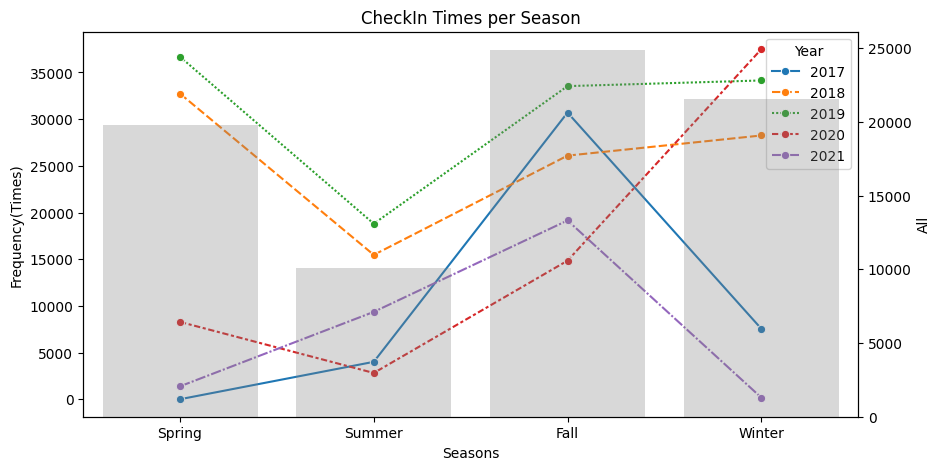

In [58]:
#seperated yearly season checkin plot
fig, ax1 = plt.subplots(figsize=(10, 5))

#Lineplot
checkinSeason = sns.lineplot(data=seasonPivot.drop(columns=['All']), marker="o", ax=ax1)
checkinSeason.set_title("CheckIn Times per Season")
checkinSeason.set_xlabel("Seasons")
checkinSeason.set_ylabel("Frequency(Times)")
checkinSeason.legend(title="Year")

#Barchart for average checkin
ax2 = ax1.twinx()
sns.barplot(x=seasonPivot.index, y=seasonPivot['All'], alpha=0.3, color='gray', ax=ax2)

plt.show()

### Used Times during Holiday

Since Hanze calendar is not accessable before 2023, I use RUG's calendar as both the vacation period and exam period

In [234]:
#check in time by holiday

#read calendar
calendar = pd.read_csv("./calendar.csv")
display(calendar.head())

,date,holiday,Exam,Lockdown
0,1/1/2017,Christmas Break,0,0
1,1/2/2017,Christmas Break,0,0
2,1/3/2017,Christmas Break,0,0
3,1/4/2017,Christmas Break,0,0
4,1/5/2017,Christmas Break,0,0


In [235]:
print(type(calendar.loc[0, "date"]))

<class 'str'>


In [236]:
calendar["date"] = calendar["date"].apply(pd.to_datetime).apply(lambda x: x.date())
print(type(calendar.loc[0, "date"]))

<class 'datetime.date'>


In [237]:
#set date as index
calendar = calendar.set_index("date")
display(calendar.head())

,holiday,Exam,Lockdown
date,,,
2017-01-01,Christmas Break,0,0
2017-01-02,Christmas Break,0,0
2017-01-03,Christmas Break,0,0
2017-01-04,Christmas Break,0,0
2017-01-05,Christmas Break,0,0


In [238]:
print(calendar["holiday"].info())
print("="*20)
print(calendar["holiday"].size)
print("="*20)

numCalendar = calendar.groupby(["Lockdown", "holiday"]).size().reset_index(name='Frequency')
display(numCalendar)

<class 'pandas.core.series.Series'>
Index: 1826 entries, 2017-01-01 to 2021-12-31
Series name: holiday
Non-Null Count  Dtype 
--------------  ----- 
343 non-null    object
dtypes: object(1)
memory usage: 28.5+ KB
None
1826


,Lockdown,holiday,Frequency
0,0,Ascension Day,3
1,0,Christmas Break,42
2,0,Easter,9
3,0,Flexible Break,13
4,0,Kingsday,3
5,0,Liberation Day,3
6,0,Summer Vacation,145
7,0,Whit,6
8,1,Ascension Day,2
9,1,Christmas Break,19


In [239]:
def getHoliday(datetime):
    date = datetime.date()
    return calendar.loc[date, "holiday"]

In [240]:
#return holiday of the date, if not holiday then NaN
checkinDF["Holiday"] = checkinDF["Checkin Time"].apply(getHoliday)
display(checkinDF.head())

,Client ID,Institution,Gender,Card Type,Checkin Time,Year,Month,Weekday,Season,Holiday,Covid,Exam
0,168236,Medewerker RUG/Hanze,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August,Tuesday,Summer,Summer Vacation,0,0
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August,Tuesday,Summer,Summer Vacation,0,0
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August,Tuesday,Summer,Summer Vacation,0,0
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August,Tuesday,Summer,Summer Vacation,0,0
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August,Tuesday,Summer,Summer Vacation,0,0


In [241]:
print(checkinDF["Holiday"].value_counts())

Holiday
Summer Vacation    19633
Christmas Break     4157
Flexible Break      1934
Easter              1088
Whit                 721
Ascension Day        489
Name: count, dtype: int64


In [242]:
#add if it's during Covid lockdown
def getCovid(datetime):
    date = datetime.date()
    return calendar.loc[date, "Lockdown"]

In [243]:
checkinDF["Covid"] = checkinDF["Checkin Time"].apply(getCovid)
display(checkinDF.head())

,Client ID,Institution,Gender,Card Type,Checkin Time,Year,Month,Weekday,Season,Holiday,Covid,Exam
0,168236,Medewerker RUG/Hanze,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August,Tuesday,Summer,Summer Vacation,0,0
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August,Tuesday,Summer,Summer Vacation,0,0
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August,Tuesday,Summer,Summer Vacation,0,0
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August,Tuesday,Summer,Summer Vacation,0,0
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August,Tuesday,Summer,Summer Vacation,0,0


In [244]:
#groupby covid and holiday
numHoliday = checkinDF.groupby(["Covid", "Holiday"]).size().reset_index(name='Frequency')

display(numHoliday)

,Covid,Holiday,Frequency
0,0,Ascension Day,487
1,0,Christmas Break,4157
2,0,Easter,1085
3,0,Flexible Break,1934
4,0,Summer Vacation,14859
5,0,Whit,721
6,1,Ascension Day,2
7,1,Easter,3
8,1,Summer Vacation,4774


Since Summer Vacation got more days in a year, it's pretty normal that it has the highest frequency.
Hence I decided to normalize them

In [245]:
numAllHoliday = numCalendar.merge(numHoliday, how = "left",\
                                  left_on = ["Lockdown", "holiday"], right_on = ["Covid", "Holiday"],\
                                    suffixes = ["_hol", "_check"])

display(numAllHoliday)

,Lockdown,holiday,Frequency_hol,Covid,Holiday,Frequency_check
0,0,Ascension Day,3,0.0,Ascension Day,487.0
1,0,Christmas Break,42,0.0,Christmas Break,4157.0
2,0,Easter,9,0.0,Easter,1085.0
3,0,Flexible Break,13,0.0,Flexible Break,1934.0
4,0,Kingsday,3,NaN,NaN,NaN
5,0,Liberation Day,3,NaN,NaN,NaN
6,0,Summer Vacation,145,0.0,Summer Vacation,14859.0
7,0,Whit,6,0.0,Whit,721.0
8,1,Ascension Day,2,1.0,Ascension Day,2.0
9,1,Christmas Break,19,NaN,NaN,NaN


In [246]:
numAllHoliday["Frequency_check"].fillna(0, inplace = True)
display(numAllHoliday)

C:\Users\watas\AppData\Local\Temp\ipykernel_58312\1044055377.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  numAllHoliday["Frequency_check"].fillna(0, inplace = True)


,Lockdown,holiday,Frequency_hol,Covid,Holiday,Frequency_check
0,0,Ascension Day,3,0.0,Ascension Day,487.0
1,0,Christmas Break,42,0.0,Christmas Break,4157.0
2,0,Easter,9,0.0,Easter,1085.0
3,0,Flexible Break,13,0.0,Flexible Break,1934.0
4,0,Kingsday,3,NaN,NaN,0.0
5,0,Liberation Day,3,NaN,NaN,0.0
6,0,Summer Vacation,145,0.0,Summer Vacation,14859.0
7,0,Whit,6,0.0,Whit,721.0
8,1,Ascension Day,2,1.0,Ascension Day,2.0
9,1,Christmas Break,19,NaN,NaN,0.0


In [247]:
numAllHoliday["Normalized"] = numAllHoliday["Frequency_check"] / numAllHoliday["Frequency_hol"]
display(numAllHoliday)

,Lockdown,holiday,Frequency_hol,Covid,Holiday,Frequency_check,Normalized
0,0,Ascension Day,3,0.0,Ascension Day,487.0,162.333333
1,0,Christmas Break,42,0.0,Christmas Break,4157.0,98.976190
2,0,Easter,9,0.0,Easter,1085.0,120.555556
3,0,Flexible Break,13,0.0,Flexible Break,1934.0,148.769231
4,0,Kingsday,3,NaN,NaN,0.0,0.000000
5,0,Liberation Day,3,NaN,NaN,0.0,0.000000
6,0,Summer Vacation,145,0.0,Summer Vacation,14859.0,102.475862
7,0,Whit,6,0.0,Whit,721.0,120.166667
8,1,Ascension Day,2,1.0,Ascension Day,2.0,1.000000
9,1,Christmas Break,19,NaN,NaN,0.0,0.000000


C:\Users\watas\AppData\Local\Temp\ipykernel_58312\880302981.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  holiday.set_xticklabels(holiday.get_xticklabels(), rotation=45, ha = "right")


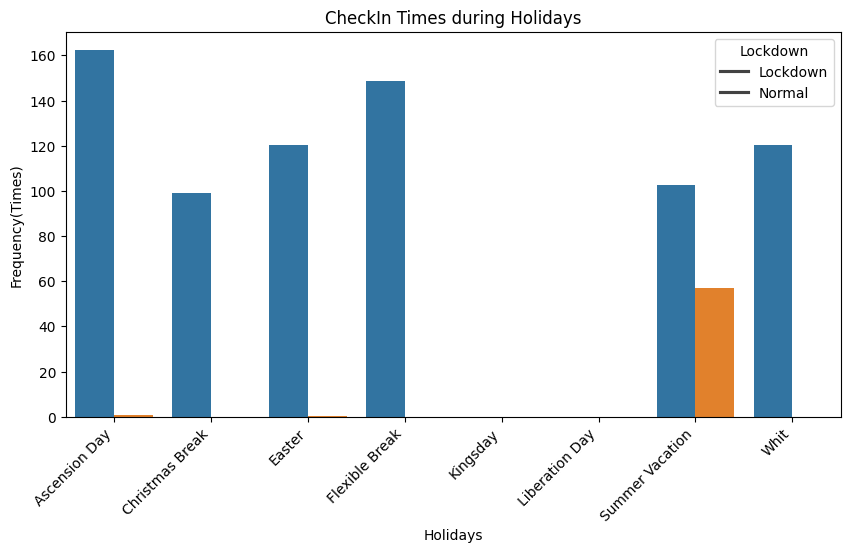

In [248]:
#plot
plt.figure(figsize=(10,5))
holiday = sns.barplot(data = numAllHoliday, x="holiday", y="Normalized", hue="Lockdown")
holiday.set_title("CheckIn Times during Holidays")
holiday.set_xlabel("Holidays")
holiday.set_ylabel("Frequency(Times)")
holiday.legend(title = "Lockdown", labels = ["Lockdown", "Normal"])
holiday.set_xticklabels(holiday.get_xticklabels(), rotation=45, ha = "right")


plt.show()

In [249]:
#between holidays and non-holidays
holidayDF = checkinDF[["Holiday", "Covid"]]
display(holidayDF.head())

,Holiday,Covid
0,Summer Vacation,0
1,Summer Vacation,0
2,Summer Vacation,0
3,Summer Vacation,0
4,Summer Vacation,0


In [250]:
holidayDF.loc[~(holidayDF["Holiday"].isna()), "Holiday"] = 1
holidayDF.loc[holidayDF["Holiday"].isna(), "Holiday"] = 0
display(holidayDF.head())

,Holiday,Covid
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [251]:
print(holidayDF["Holiday"].value_counts())

Holiday
0    333439
1     28022
Name: count, dtype: int64


The same goes with workday, since most days in a year are not holiday, I decided to normalized them as well

In [252]:
calendarHoliday = calendar[["holiday", "Lockdown"]]

calendarHoliday.loc[~(calendarHoliday["holiday"].isna()), "holiday"] = 1
calendarHoliday.loc[calendarHoliday["holiday"].isna(), "holiday"] = 0
display(calendarHoliday.head())

,holiday,Lockdown
date,,
2017-01-01,1,0
2017-01-02,1,0
2017-01-03,1,0
2017-01-04,1,0
2017-01-05,1,0


In [253]:
numHolidayDF = holidayDF.groupby(["Covid", "Holiday"]).size().reset_index(name='Frequency')
numCalHoliday = calendarHoliday.groupby(["Lockdown", "holiday"]).size().reset_index(name='Frequency')
display(numHolidayDF)
display(numCalHoliday)

,Covid,Holiday,Frequency
0,0,0,307549
1,0,1,23243
2,1,0,25890
3,1,1,4779


,Lockdown,holiday,Frequency
0,0,0,1039
1,0,1,224
2,1,0,444
3,1,1,119


In [254]:
numAllDay = numCalHoliday.merge(numHolidayDF, how = "left",\
                                  left_on = ["Lockdown", "holiday"], right_on = ["Covid", "Holiday"],\
                                    suffixes = ["_hol", "_check"])

display(numAllDay)

,Lockdown,holiday,Frequency_hol,Covid,Holiday,Frequency_check
0,0,0,1039,0,0,307549
1,0,1,224,0,1,23243
2,1,0,444,1,0,25890
3,1,1,119,1,1,4779


In [255]:
numAllDay["Normalized"] = numAllDay["Frequency_check"] / numAllDay["Frequency_hol"]
display(numAllDay)

,Lockdown,holiday,Frequency_hol,Covid,Holiday,Frequency_check,Normalized
0,0,0,1039,0,0,307549,296.004812
1,0,1,224,0,1,23243,103.763393
2,1,0,444,1,0,25890,58.310811
3,1,1,119,1,1,4779,40.159664


C:\Users\watas\AppData\Local\Temp\ipykernel_58312\2732586565.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  day.set_xticklabels(dayType)


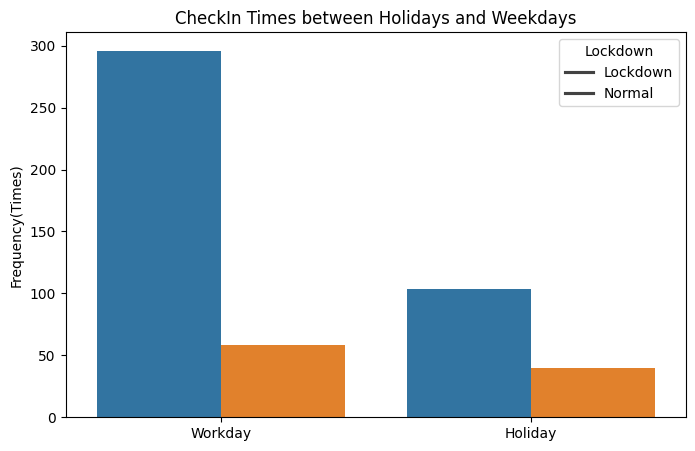

In [256]:
#plot
plt.figure(figsize=(8,5))
day = sns.barplot(data = numAllDay, x="holiday", y="Normalized", hue="Lockdown")
day.set_title("CheckIn Times between Holidays and Weekdays")
day.set_xlabel("")
day.set_ylabel("Frequency(Times)")
day.legend(title = "Lockdown", labels = ["Lockdown", "Normal"])

dayType = ["Workday", "Holiday"]
day.set_xticklabels(dayType)


plt.show()

### Used Times during Exam Period

In [220]:
#check in time during exam
def getExam(datetime):
    date = datetime.date()
    return calendar.loc[date, "Exam"]

In [221]:
checkinDF["Exam"] = checkinDF["Checkin Time"].apply(getExam)
display(checkinDF.head())

,Client ID,Institution,Gender,Card Type,Checkin Time,Year,Month,Weekday,Season,Holiday,Covid,Exam
0,168236,Medewerker RUG/Hanze,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August,Tuesday,Summer,Summer Vacation,0,0
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August,Tuesday,Summer,Summer Vacation,0,0
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August,Tuesday,Summer,Summer Vacation,0,0
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August,Tuesday,Summer,Summer Vacation,0,0
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August,Tuesday,Summer,Summer Vacation,0,0


In [ ]:
#normalized exam and normal school day
numExam = checkinDF[checkinDF["Holiday"].isna()].groupby(["Covid", "Exam"]).size().reset_index(name = "Frequency")
display(numExam)

,Covid,Exam,Frequency
0,0,0,238359
1,0,1,69190
2,1,0,17885
3,1,1,8005


In [ ]:
numCalExam = calendar[calendar["holiday"].isna()].groupby(["Lockdown", "Exam"]).size().reset_index(name = "Frequency")
display(numCalExam)

,Lockdown,Exam,Frequency
0,0,0,765
1,0,1,274
2,1,0,302
3,1,1,142


In [230]:
numAllExam = numCalExam.merge(numExam, how = "left",\
                                  left_on = ["Lockdown", "Exam"], right_on = ["Covid", "Exam"],\
                                    suffixes = ["_hol", "_check"])

numAllExam["Normalized"] = numAllExam["Frequency_check"] / numAllExam["Frequency_hol"]
display(numAllExam)

,Lockdown,Exam,Frequency_hol,Covid,Frequency_check,Normalized
0,0,0,765,0,238359,311.580392
1,0,1,274,0,69190,252.518248
2,1,0,302,1,17885,59.221854
3,1,1,142,1,8005,56.373239


C:\Users\watas\AppData\Local\Temp\ipykernel_58312\1818671610.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  exam.set_xticklabels(examType)


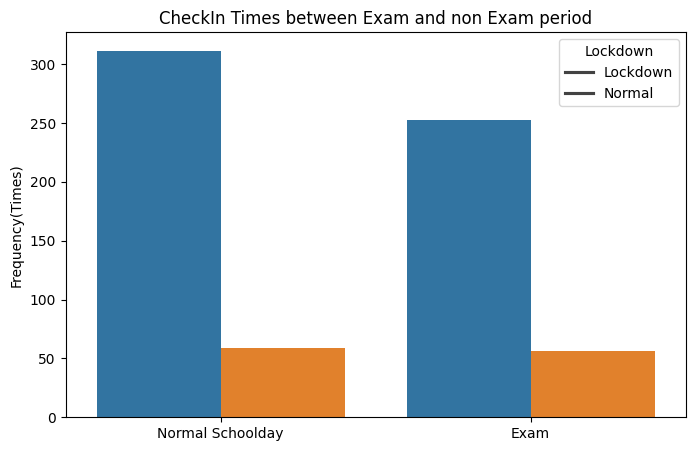

In [233]:
#plot
plt.figure(figsize=(8,5))
exam = sns.barplot(data = numAllExam, x="Exam", y="Normalized", hue="Lockdown")
exam.set_title("CheckIn Times between Exam and non Exam period")
exam.set_xlabel("")
exam.set_ylabel("Frequency(Times)")
exam.legend(title = "Lockdown", labels = ["Lockdown", "Normal"])

examType = ["Normal Schoolday", "Exam"]
exam.set_xticklabels(examType)


plt.show()

### Used Times by Weather

In [ ]:
#load the weather data

## DAG

### Indentifying Relationship

In [ ]:
# Initialize a directed graph
dag = nx.DiGraph()

# Add nodes (features)
features = ["Gender", "Education Institute", "Date", "Season", "Month", "Weekday", "Holiday", "Exam", "Covid", "numFitness"]
dag.add_nodes_from(features)

# Define the relationships between features (edges)
edges = [
    ("Gender", "numFitness"),
    ("Education Institute", "numFitness"),
    ("Card Type", "numFitness"),
    ("Season", "numFitness"),
    ("Month", "numFitness"),
    ("Weekday", "numFitness"),
    ("Holiday", "numFitness"),
    ("Exam", "numFitness"),
    ("Covid", "numFitness"),
    ("Covid", "Holiday"),
    ("Covid", "Exam"),
    ("Date", "Month"),
    ("Month", "Season"),
    ("Date", "Season"),
    ("Date", "Weekday"),
    ("Date", "Holiday"),
    ("Date", "Exam"),
]

dag.add_edges_from(edges)

### Create Graph

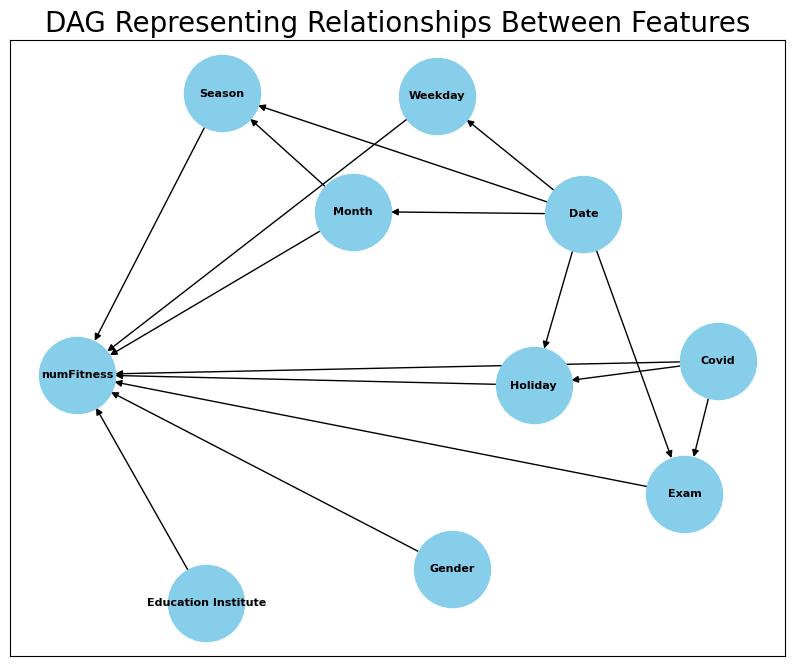

In [ ]:
# Visualize the DAG
#plt.figure(figsize=(10, 8))
#pos = nx.spring_layout(dag, iterations=1000)  # Position nodes using Fruchterman-Reingold force-directed algorithm
#nx.draw_networkx(dag, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=8, font_weight='bold', edge_color='black')
#plt.title("DAG Representing Relationships Between Features", fontsize=20)

#plt.show()

# Model